# Part I - Ford GoBike System Data Exploration
## by Emmanuel Udo

## Introduction
> This project provides insightful analysis on deep explorations on the Ford GoBiking System Data. The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February, 2019.

> The Data on each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer where “Subscriber” = Member, “Customer” = Casual)

> This investigation, is aimed at looking into how the number of trips and trip duration is dependent on other features (especially, user type) from the dataset. I will be investigating:

> - Distribution of Trips across days of the week in the month of February, 2019
> - Distribution of Trips on hourly basis in the Month of February Year 2019
> - Distribution of Riders by Gender
> - Distribution of Riders by Age Bracket
> - Average trip duration across the week by user type

### Questions for Analysis

> In this presentation, answers to the underlisted questions will be provided based on insights from exploratory analysis carried out on the Ford GoBike System Data:
- 1. What is the minimum trip duration by user type?
- 2. What is the maximum trip duration by user type?
- 3. What is the average trip duration by user type?
- 4. What user type made the most trip?
- 5. What bike id was mostly used for a trip?
- 6. What day of the week in the entire month has the highest number of trip and what day has the least number of trip?
- 7. What hour of the day in the entire month has the highest number of trip and what hour of the day has the least number of trip?
- 8. What are the top 10 trip start stations?
- 9. What are the Bottom 10 trip start stations?
- 10. What is the distribution of riders by gender?
- 11. What is the distribution of riders by age bracket?
- 12. What is the distribution of trips through out the month of February 2019?
- 13. Compare the two user types in terms of trip duration?

<a id='wrangling'></a>
## Data Wrangling
> A quick look at the dataset reveals that the dataset is relatively clean. Records with missing data will be kept in the dataset for as long as technically possible so as keep analysis and insights provided by this report at a high accuracy. Removal or replacement of any data will be based on thorough investigation of the record in question and must be timely.

### General Properties

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### __Reading the Data:__

In [2]:
# Load data and print out a few lines.
df = pd.read_csv('fordgobikesystemdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# information on dataframe columns and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# Printing the dataframe dimension
df.shape

(183412, 16)

#### __Data Structure__

>There are 183412 fordgobike trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 features 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

> The first five rows from our dataset reveals the following;
- There is no column that uniquely identify each row in the dataframe
- Duration_sec column is the only column in the dataset that provides numeric data for exploration and feature engineeering. This fact will limit the number of visualization types and the depth of exploration that can be done on this dataset
- The dataframe obviously needs some cleansing. Data cleaning will be done as we progress in the analysis.

#### __Main feature(s) of interest in the dataset__
> How number of trips and trip duration is dependent on other features (especially, user type) from the dataset. 


### Data Cleaning

> NaN values will be retained till the later part of this project to enable us get the best from the columns without NaN values
> Certain columns are not needed for this analysis and will thus be dropped.
> Dataset will be tested for duplicate records and will thus be dropped if any is found.

But first, a copy of the original dataset will be made. All explorations, data cleaning and analysis will be carried out on the duplicate copy

In [5]:
# make a copy of the current dataset
df1 = df.copy()

# view first five rows
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# view information on the datatypes of columns in the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


> ### __Quality issues__

> 1. start_time, end_time columns has seconds in decimal places.
> 2. start_time, end_time columns has string datatypes, instead of datetime datatype.
> 3. start_time, end_time columns are not appropriately named.
> 4. duration_sec column is not appropriately named.

> __member_birth_year datatype will not be changed from float to integer till the later part of this project. This is because this column contains NaN values. Changing datatype here will require first removing the NaN values in this column which means row records with with these values will be dropped, thereby significantly reducing the number of rows/records of the entire dataset. This will negatively asffect the accuracy of the analysis.__

> ### __Tidiness issues__
> 1. Dataset contains features that are not necessary/useful for this project.


In-between these data cleaning tasks/operations, feature engineering will be carried out to create columns that provide more datetime details and will probably be used for visualations later in the project.

### Quality Issue #1: start_time, end_time columns has seconds in decimal places.

#### Define: 

* Remove decimal part of the seconds in the start_time & end_time columns

#### Code

In [7]:
# remove characters from the decimal point till end
df1['start_time'] = df1['start_time'].str[:19]
df1['end_time'] = df1['end_time'].str[:19]

#### Test

In [8]:
# view first five rows of dataset
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Feature Engineering
> From start_time column, create a datetime datatype column named "trip_start_hour", having datetime datatype with HH:00 AM/PM format.

In [9]:
# extract hour data part of the start_time column
df1['trip_start_hour'] = df1['start_time'].str[11:16]

# convert to datetime datatype with HH:00 AM/PM format
df1['trip_start_hour'] = pd.to_datetime(df1['trip_start_hour']).apply(lambda x: x.strftime("%I:00 %p"))

# view first five dataset
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_hour
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,05:00 PM
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,06:00 PM
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:00 PM
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,05:00 PM
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,11:00 PM


### Quality Issue #2: start_time, end_time columns has string datatypes, instead  of datetime datatype.

#### Define: 

* change start_time, end_time columns datatypes from strings to datetime

#### Code

In [10]:
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

#### Test

In [11]:
# information on dataframe columns and datatype of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
trip_start_hour            183412 non-null object
dtypes: datetime64

### Quality Issue #3: start_time, end_time columns are not appropriately named.

#### Define: 

* Rename start_time, end_time columns to start_datetime and end_datetime respectively

#### Code

In [12]:
# rename datetime columns appropriately
df1.rename(columns={'start_time':'start_datetime', 'end_time': 'end_datetime'}, inplace=True)
df1.head()

,duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_hour
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,05:00 PM
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,06:00 PM
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:00 PM
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,05:00 PM
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,11:00 PM


#### Test

In [13]:
# information on dataframe columns and datatype of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183412 non-null int64
start_datetime             183412 non-null datetime64[ns]
end_datetime               183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
trip_start_hour            183412 non-null object
dtypes: datetime64

#### Feature Engineering
> From start_datetime column, create two columns named "start_date" and "start_time" respectively.

> From end_datetime column, create two columns named "end_date" and "end_time" respectively.

In [14]:
# extract start date and start time columns from start_datetime column
df1['start_date'] = df1['start_datetime'].dt.date
df1['start_time'] = df1['start_datetime'].dt.time

# extract end date and end time columns from end_datetime column
df1['end_date'] = df1['end_datetime'].dt.date
df1['end_time'] = df1['end_datetime'].dt.time

# view first 10 rows of dataset
df1.head()

,duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_hour,start_date,start_time,end_date,end_time
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,05:00 PM,2019-02-28,17:32:10,2019-03-01,08:01:55
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,06:00 PM,2019-02-28,18:53:21,2019-03-01,06:42:03
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12:00 PM,2019-02-28,12:13:13,2019-03-01,05:24:08
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,05:00 PM,2019-02-28,17:54:26,2019-03-01,04:02:36
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,11:00 PM,2019-02-28,23:54:18,2019-03-01,00:20:44


### Quality Issue #4: duration_sec column is not appropriately named.

#### Define: 

* rename duration_sec column to duration_in_seconds

#### Code

In [15]:
# rename duration_sec column to duration_in_seconds
df1.rename(columns={'duration_sec':'duration_in_seconds'}, inplace=True)

#### Test

In [16]:
# view first five rows
df1.head()

,duration_in_seconds,start_datetime,end_datetime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_hour,start_date,start_time,end_date,end_time
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,05:00 PM,2019-02-28,17:32:10,2019-03-01,08:01:55
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,06:00 PM,2019-02-28,18:53:21,2019-03-01,06:42:03
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12:00 PM,2019-02-28,12:13:13,2019-03-01,05:24:08
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,05:00 PM,2019-02-28,17:54:26,2019-03-01,04:02:36
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,11:00 PM,2019-02-28,23:54:18,2019-03-01,00:20:44


#### Feature Engineering
> From duration_in_seconds column, create a column "duration_in_minutes" to calculate trip duration in minutes.

> From duration_in_seconds column, create a column "duration_in_hours" to calculate trip duration in hours.

In [17]:
# calculate and create columns for duration in minutes and duration in hours respectively
df1['duration_in_minutes'] = df1['duration_in_seconds']/60
df1['duration_in_hours'] = df1['duration_in_seconds']/3600

# convert datatype from float to integer
df1[['duration_in_minutes', 'duration_in_hours']] = df1[['duration_in_minutes', 'duration_in_hours']].astype(int)

# view first five rows
df1.head()

,duration_in_seconds,start_datetime,end_datetime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_hour,start_date,start_time,end_date,end_time,duration_in_minutes,duration_in_hours
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,05:00 PM,2019-02-28,17:32:10,2019-03-01,08:01:55,869,14
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,06:00 PM,2019-02-28,18:53:21,2019-03-01,06:42:03,708,11
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,12:00 PM,2019-02-28,12:13:13,2019-03-01,05:24:08,1030,17
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,05:00 PM,2019-02-28,17:54:26,2019-03-01,04:02:36,608,10
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,11:00 PM,2019-02-28,23:54:18,2019-03-01,00:20:44,26,0


#### Deeply investigate start_station_name and end_station_name columns respectively for duplicate data entry & typograthical error
> A good approach to achieve this task is to carry out a value count on these columns and then arrange arrange the data entries in an alphabetical order. This way, typograhical error will be exposed. Duplicate data entries with typographical error will automatically appear serially next to each other. Because only a character or a couple of characters of a duplicate data entry are mis-spelled, they will appear next to each other in a serial arrangement.

In [18]:
# investigate start station name column for typographical errors that may lead to multiple entries
df1['start_station_name'].value_counts().sort_index(ascending=True)

10th Ave at E 15th St                                      57
10th St at Fallon St                                      353
10th St at University Ave                                 190
11th St at Bryant St                                      828
11th St at Natoma St                                      868
13th St at Franklin St                                    266
14th St at Filbert St                                      90
14th St at Mandela Pkwy                                   313
14th St at Mission St                                     578
15th St at Potrero Ave                                    630
16th St Depot                                               2
16th St Mission BART                                      512
16th St Mission BART Station 2                           1031
16th St at Prosper St                                     453
17th & Folsom Street Park (17th St at Folsom St)          454
17th St at Dolores St                                     428
17th St 

> start station name column does not contain multiple entries caused by typographical error

In [19]:
# investigate end station name column for typographical errors that may lead to multiple entries
df1['end_station_name'].value_counts().sort_index(ascending=True)

10th Ave at E 15th St                                      37
10th St at Fallon St                                      376
10th St at University Ave                                 277
11th St at Bryant St                                      990
11th St at Natoma St                                      874
13th St at Franklin St                                    207
14th St at Filbert St                                      79
14th St at Mandela Pkwy                                   322
14th St at Mission St                                     489
15th St at Potrero Ave                                    661
16th St Depot                                               6
16th St Mission BART                                      526
16th St Mission BART Station 2                           1084
16th St at Prosper St                                     404
17th & Folsom Street Park (17th St at Folsom St)          490
17th St at Dolores St                                     347
17th St 

>> end station name column does not contain multiple entries caused by typographical error

### Tidiness Issue #1: Dataset contains features that are not necessary/useful for this project.

#### Define: 

* Drop the following columns; start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, and bike_share_for_all_trip.

#### Code

In [20]:
# drop columns
df1.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)

#### Test

In [21]:
# confirm dropped features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_in_seconds    183412 non-null int64
start_datetime         183412 non-null datetime64[ns]
end_datetime           183412 non-null datetime64[ns]
start_station_name     183215 non-null object
end_station_name       183215 non-null object
bike_id                183412 non-null int64
user_type              183412 non-null object
member_birth_year      175147 non-null float64
member_gender          175147 non-null object
trip_start_hour        183412 non-null object
start_date             183412 non-null object
start_time             183412 non-null object
end_date               183412 non-null object
end_time               183412 non-null object
duration_in_minutes    183412 non-null int64
duration_in_hours      183412 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(9)
memory usage: 22.4+ MB


In [22]:
# change datatype from object to datetime
df1['start_date'] = pd.to_datetime(df1['start_date'])
df1['end_date'] = pd.to_datetime(df1['end_date'])

# change datatype to float
df1['bike_id'] = df1['bike_id'].astype(str)

# confirm changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_in_seconds    183412 non-null int64
start_datetime         183412 non-null datetime64[ns]
end_datetime           183412 non-null datetime64[ns]
start_station_name     183215 non-null object
end_station_name       183215 non-null object
bike_id                183412 non-null object
user_type              183412 non-null object
member_birth_year      175147 non-null float64
member_gender          175147 non-null object
trip_start_hour        183412 non-null object
start_date             183412 non-null datetime64[ns]
start_time             183412 non-null object
end_date               183412 non-null datetime64[ns]
end_time               183412 non-null object
duration_in_minutes    183412 non-null int64
duration_in_hours      183412 non-null int64
dtypes: datetime64[ns](4), float64(1), int64(3), object(8)
memory usage: 22.4+ MB


In [23]:
#check the dataframe for duplicates
df1.duplicated().sum()

0

> There is no duplicate record in the dataset 

#### Feature Engineering
> From start_datetime column, create a column "trip_start_day" to extract day of the week each trip was started.

In [24]:
# extract day of the week from trip start day
df1['trip_start_day'] = df1['start_datetime'].dt.weekday_name

# view first five rows
df1.head()

,duration_in_seconds,start_datetime,end_datetime,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,trip_start_hour,start_date,start_time,end_date,end_time,duration_in_minutes,duration_in_hours,trip_start_day
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,05:00 PM,2019-02-28,17:32:10,2019-03-01,08:01:55,869,14,Thursday
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,06:00 PM,2019-02-28,18:53:21,2019-03-01,06:42:03,708,11,Thursday
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,12:00 PM,2019-02-28,12:13:13,2019-03-01,05:24:08,1030,17,Thursday
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,05:00 PM,2019-02-28,17:54:26,2019-03-01,04:02:36,608,10,Thursday
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,11:00 PM,2019-02-28,23:54:18,2019-03-01,00:20:44,26,0,Thursday


In [25]:
# view data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_in_seconds    183412 non-null int64
start_datetime         183412 non-null datetime64[ns]
end_datetime           183412 non-null datetime64[ns]
start_station_name     183215 non-null object
end_station_name       183215 non-null object
bike_id                183412 non-null object
user_type              183412 non-null object
member_birth_year      175147 non-null float64
member_gender          175147 non-null object
trip_start_hour        183412 non-null object
start_date             183412 non-null datetime64[ns]
start_time             183412 non-null object
end_date               183412 non-null datetime64[ns]
end_time               183412 non-null object
duration_in_minutes    183412 non-null int64
duration_in_hours      183412 non-null int64
trip_start_day         183412 non-null object
dtypes: datetime64[ns](4), float64(1), int64(3), object(9)
memory usage: 23.8

In [26]:
# confirm if every day of the week was captured
df1['trip_start_day'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: trip_start_day, dtype: int64

In [27]:
# reorder dataframe columns to make reading columns from left to right make logical sense
df1 = df1[['bike_id', 'user_type', 'member_birth_year', 'member_gender', 'trip_start_day', 'trip_start_hour', 'start_station_name', 'end_station_name', 'start_datetime', 'end_datetime', 'start_date', 'end_date', 'start_time', 'end_time',  'duration_in_seconds', 'duration_in_minutes', 'duration_in_hours']]
df1

,bike_id,user_type,member_birth_year,member_gender,trip_start_day,trip_start_hour,start_station_name,end_station_name,start_datetime,end_datetime,start_date,end_date,start_time,end_time,duration_in_seconds,duration_in_minutes,duration_in_hours
0,4902,Customer,1984.0,Male,Thursday,05:00 PM,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10,2019-03-01 08:01:55,2019-02-28,2019-03-01,17:32:10,08:01:55,52185,869,14
1,2535,Customer,NaN,NaN,Thursday,06:00 PM,The Embarcadero at Steuart St,Berry St at 4th St,2019-02-28 18:53:21,2019-03-01 06:42:03,2019-02-28,2019-03-01,18:53:21,06:42:03,42521,708,11
2,5905,Customer,1972.0,Male,Thursday,12:00 PM,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13,2019-03-01 05:24:08,2019-02-28,2019-03-01,12:13:13,05:24:08,61854,1030,17
3,6638,Subscriber,1989.0,Other,Thursday,05:00 PM,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26,2019-03-01 04:02:36,2019-02-28,2019-03-01,17:54:26,04:02:36,36490,608,10
4,4898,Subscriber,1974.0,Male,Thursday,11:00 PM,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18,2019-03-01 00:20:44,2019-02-28,2019-03-01,23:54:18,00:20:44,1585,26,0
5,5200,Subscriber,1959.0,Male,Thursday,11:00 PM,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58,2019-03-01 00:19:51,2019-02-28,2019-03-01,23:49:58,00:19:51,1793,29,0
6,3803,Subscriber,1983.0,Female,Thursday,11:00 PM,Palm St at Willow St,San Jose Diridon Station,2019-02-28 23:55:35,2019-03-01 00:14:42,2019-02-28,2019-03-01,23:55:35,00:14:42,1147,19,0
7,6329,Subscriber,1989.0,Male,Thursday,11:00 PM,Washington St at Kearny St,Valencia St at 21st St,2019-02-28 23:41:06,2019-03-01 00:08:02,2019-02-28,2019-03-01,23:41:06,00:08:02,1615,26,0
8,6548,Subscriber,1988.0,Other,Thursday,11:00 PM,Washington St at Kearny St,Valencia St at 21st St,2019-02-28 23:41:48,2019-03-01 00:07:59,2019-02-28,2019-03-01,23:41:48,00:07:59,1570,26,0
9,6488,Subscriber,1992.0,Male,Thursday,11:00 PM,Post St at Kearny St,Mission Playground,2019-02-28 23:49:47,2019-03-01 00:07:17,2019-02-28,2019-03-01,23:49:47,00:07:17,1049,17,0


In [28]:
# # confirm if every day of the month was captured
df1['start_date'].value_counts()

2019-02-28    9829
2019-02-20    9667
2019-02-21    9536
2019-02-19    9467
2019-02-07    9234
2019-02-22    9204
2019-02-06    9057
2019-02-11    8681
2019-02-05    8486
2019-02-12    8473
2019-02-27    7715
2019-02-15    7288
2019-02-25    7033
2019-02-14    6598
2019-02-08    6356
2019-02-01    6133
2019-02-18    5647
2019-02-04    5491
2019-02-23    5451
2019-02-26    5387
2019-02-24    4497
2019-02-17    4225
2019-02-16    3993
2019-02-10    3960
2019-02-02    3231
2019-02-13    3202
2019-02-03    2841
2019-02-09    2730
Name: start_date, dtype: int64

__Descriptive Statistics__

In [29]:
# print a summary statistics of dataframe
df1.describe()

,member_birth_year,duration_in_seconds,duration_in_minutes,duration_in_hours
count,175147.000000,183412.000000,183412.000000,183412.000000
mean,1984.806437,726.078435,11.609393,0.026285
std,10.116689,1794.389780,29.908067,0.466406
min,1878.000000,61.000000,1.000000,0.000000
25%,1980.000000,325.000000,5.000000,0.000000
50%,1987.000000,514.000000,8.000000,0.000000
75%,1992.000000,796.000000,13.000000,0.000000
max,2001.000000,85444.000000,1424.000000,23.000000


> Statistics on "member_birth_year" should be ignored, datatype will be changed when exploratory analysis specific to riders age is being carried out. This column also contain NaN values. The NaN values has been retained for now for the accuracy of other analysis not related to member_birth_year.

We can see from the above, that the average trip duration is 726 seconds (11 minutes)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the minimum trip duration by user type?

#### Visualization

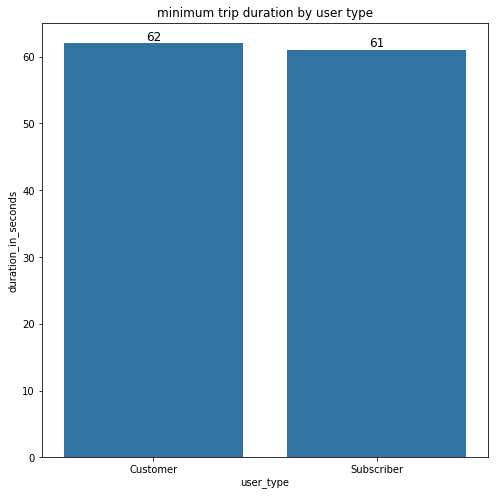

In [30]:
# define a function that makes bar plot by taking attribute as "minimum" or "maximum"
def plot_bar(func, titled):
    # groupby user type and then find the minimum or maximum trip duration
    if func=='minimum':
        min_duration = df1.groupby('user_type')['duration_in_seconds'].min()
        min_duration1 = df1.groupby('user_type', as_index=False)['duration_in_seconds'].min()
    elif func=='maximum':
        min_duration = df1.groupby('user_type')['duration_in_seconds'].max()
        min_duration1 = df1.groupby('user_type', as_index=False)['duration_in_seconds'].max()
        
    # set plot size
    plt.figure(figsize=(8,8))
    
    # make all bars the same colour
    base_color = sb.color_palette()[0]
    
    # define values for x axis and y axis and dataframe
    bar = sb.barplot(data=min_duration1, x='user_type', y='duration_in_seconds', color=base_color );
    
    # text annotation
    for i in range(len(min_duration)):
        bar.text(i, min_duration[i]+0.5, str(min_duration[i]), ha='center', fontsize=12)
        
    # add title
    plt.title(titled)
    
    # show plot
    plt.show()

# plot minimum trip duration by user type
plot_bar('minimum', 'minimum trip duration by user type')

#### Observation

> The minimum trip duration by a customer is 62 seconds while minimum trip by a subscriber is 61 seconds

### Research Question 2: What is the maximum trip duration by user type?

#### Visualization

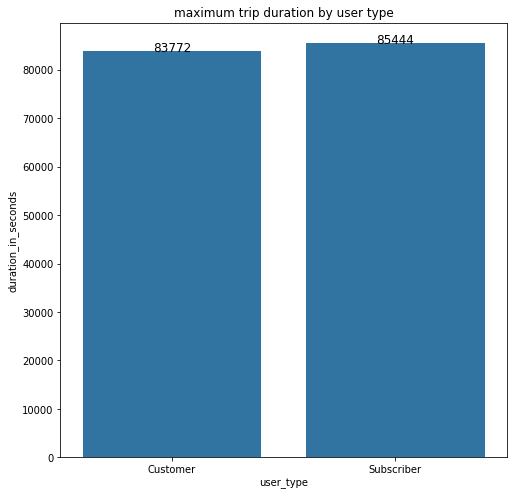

In [31]:
# plot maximum trip duration by user type
plot_bar('maximum', 'maximum trip duration by user type')

#### Observation

> The maximum trip duration by a customer in 83,772 seconds while maximum trip by a subscriber in 85,444 seconds

### Research Question 3: What is the average trip duration by user type?

#### Visualization

In [32]:
# create an object variable of the mean duration in seconds
mean_duration = df1.groupby('user_type', as_index=False)['duration_in_seconds'].mean()
# view dataframe
mean_duration

,user_type,duration_in_seconds
0,Customer,1432.465019
1,Subscriber,640.263678


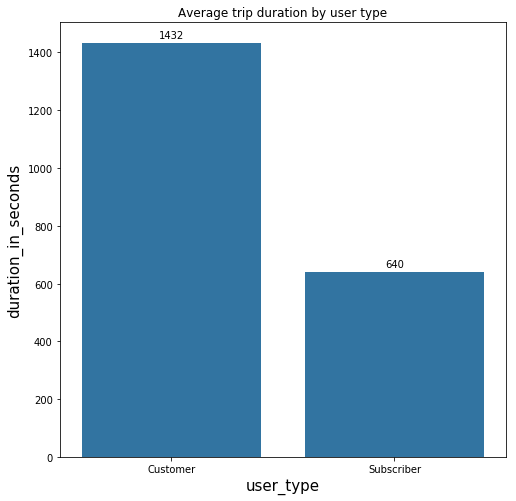

In [33]:
# set plot size
plt.figure(figsize=(8,8))

# make all bars the same colour
base_color = sb.color_palette()[0]

# select dataset, x and y variable for the plot
plots = sb.barplot(data=mean_duration, x='user_type', y='duration_in_seconds', color=base_color)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
# setting the label for x-axis
plt.xlabel('user_type', size=15)

# setting the label for y-axis
plt.ylabel('duration_in_seconds', size=15)

# setting graph title
plt.title('Average trip duration by user type')
    
plt.show()

#### Observation

> The average trip duration by a customer is 1,432 seconds while the average trip duration by a subscriber is 640 seconds

### Research Question 4: What user type made the most trip?

#### Visualization

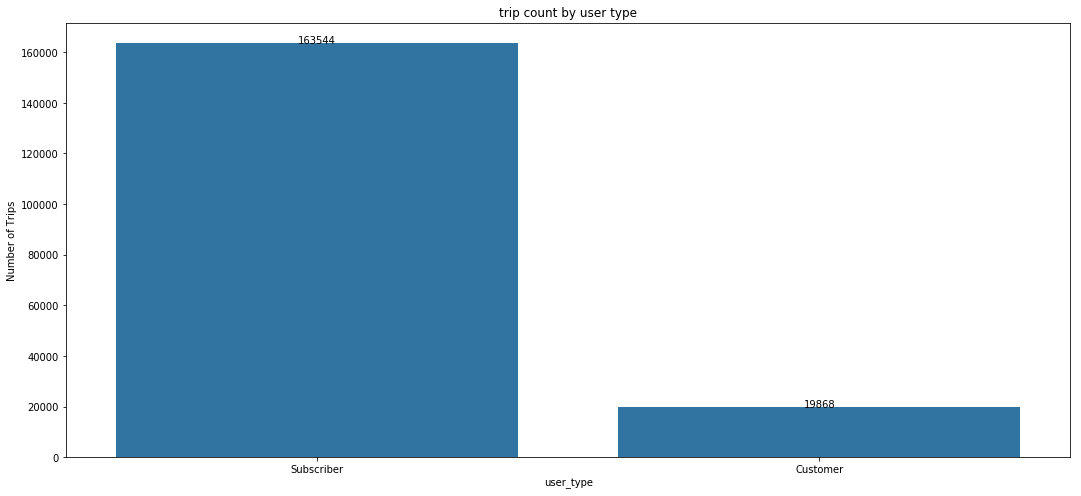

In [34]:
# define a function to make seaborn's countplot
def plot_count(attrib, titled):
    # set plot size
    plt.figure(figsize=(18,8))
    
    # prepare dataframe for count plot
    trip_count = df1[attrib].value_counts().head(10)
    user_order = trip_count.index
    
    # make all bars the same colour
    base_color = sb.color_palette()[0]
    
    # define values for x axis and y axis and dataframe
    sb.countplot(data=df1, x=attrib, color=base_color, order=user_order)
    
    # text annotation
    for i in range(trip_count.shape[0]):
        count = trip_count[i]
        pct_string = '{:1.0f}'.format(count)
        plt.text(i, count+1, pct_string, ha='center')
        
    # add title
    plt.title(titled)
    # y label
    plt.ylabel('Number of Trips')
    
    # show plot
    plt.show()

# make plot
plot_count('user_type', 'trip count by user type')

#### Observation

> Subscribers made the most trip, a total of 163,544 trips

### Research Question 5: What bike id was mostly used for a trip?

#### Visualization

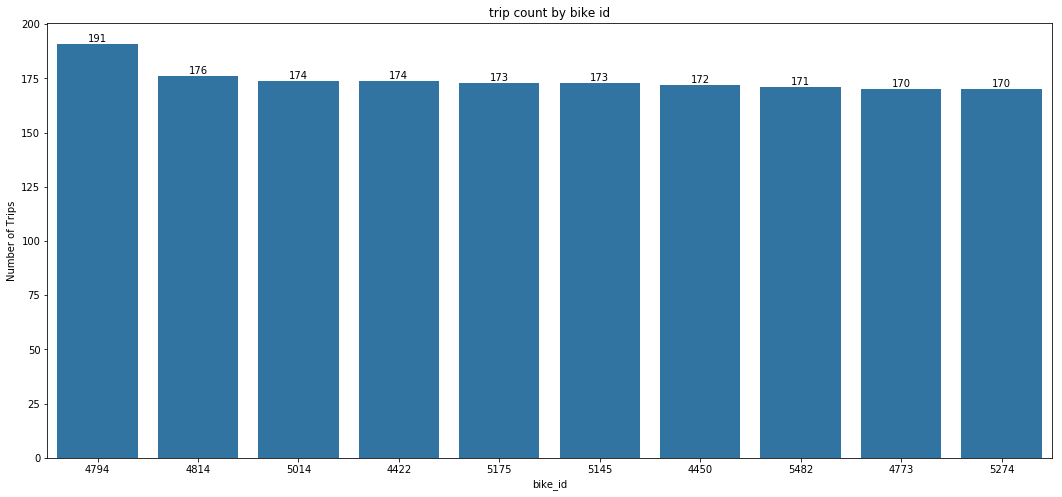

In [35]:
# make plot
plot_count('bike_id', 'trip count by bike id')

#### Observation

> Bike id 4794 was mostly used for trips

### Research Question 6: What day of the week in the entire month has the highest number of trip and what day has the least number of trip?

#### Visualization

In [36]:
# write a for loop to assign serial numbers ranging from 0 to 6, to days of the week from Monday to Sunday
day_code = []
for d in df1['trip_start_day']:
    if d == 'Monday':
        day_code.append (0)
    elif d == 'Tuesday':
        day_code.append (1)
    elif d == 'Wednesday':
        day_code.append (2)
    elif d == 'Thursday':
        day_code.append (3)
    elif d == 'Friday':
        day_code.append (4)
    elif d == 'Saturday':
        day_code.append (5)
    elif d == 'Sunday':
        day_code.append (6)

# populate these codes in a new column in the dataframe
df1['Day_code'] = day_code

# confirm execution
df1.head()

,bike_id,user_type,member_birth_year,member_gender,trip_start_day,trip_start_hour,start_station_name,end_station_name,start_datetime,end_datetime,start_date,end_date,start_time,end_time,duration_in_seconds,duration_in_minutes,duration_in_hours,Day_code
0,4902,Customer,1984.0,Male,Thursday,05:00 PM,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10,2019-03-01 08:01:55,2019-02-28,2019-03-01,17:32:10,08:01:55,52185,869,14,3
1,2535,Customer,NaN,NaN,Thursday,06:00 PM,The Embarcadero at Steuart St,Berry St at 4th St,2019-02-28 18:53:21,2019-03-01 06:42:03,2019-02-28,2019-03-01,18:53:21,06:42:03,42521,708,11,3
2,5905,Customer,1972.0,Male,Thursday,12:00 PM,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13,2019-03-01 05:24:08,2019-02-28,2019-03-01,12:13:13,05:24:08,61854,1030,17,3
3,6638,Subscriber,1989.0,Other,Thursday,05:00 PM,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26,2019-03-01 04:02:36,2019-02-28,2019-03-01,17:54:26,04:02:36,36490,608,10,3
4,4898,Subscriber,1974.0,Male,Thursday,11:00 PM,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18,2019-03-01 00:20:44,2019-02-28,2019-03-01,23:54:18,00:20:44,1585,26,0,3


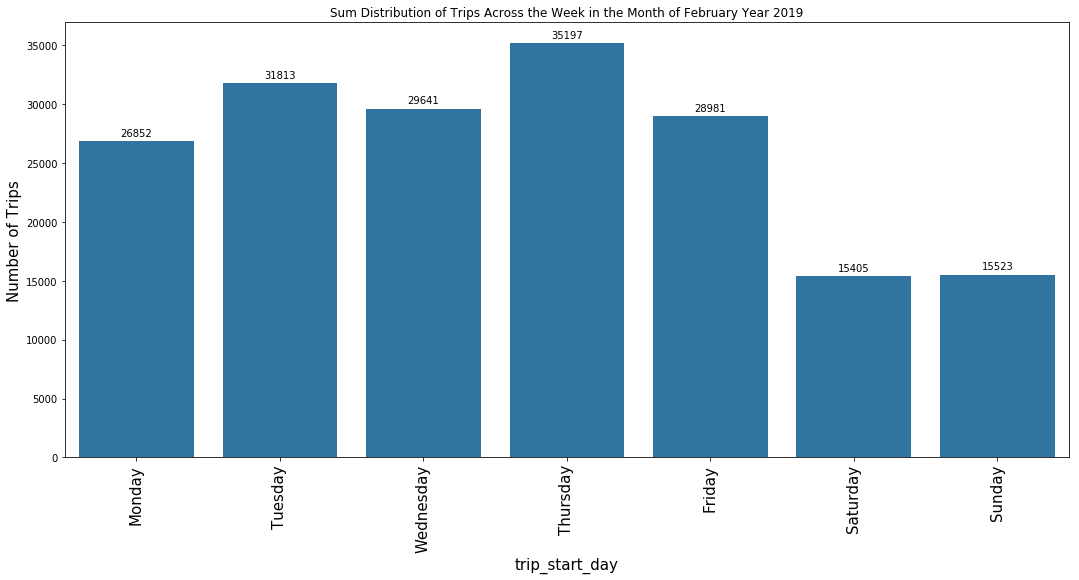

In [37]:
# create function to plot bar chart by taking two attributes and a title
def dist_bar(attrib1, attrib2, titled):
    # select two attributes from parent dataframe and save in an object variable
    day_count = df1[[attrib1, attrib2]]
    
    # create sorted object variables
    sorted = day_count.sort_values(by=[attrib2])
    sorted = sorted.reset_index(drop=True)
    sorted1 = sorted.groupby([attrib2, attrib1])[attrib1].size().reset_index(name='count')
    
    # set plot size
    plt.figure(figsize=(18,8))
    
    # make all bars the same colour
    base_color = sb.color_palette()[0]
    
    # make plot
    plots = sb.barplot(data=sorted1, x=attrib1, y='count', color=base_color)
    
    # text annotation
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
    # setting the label for x-axis
    plt.xlabel(attrib1, size=15)
    
    # setting the label for y-axis
    plt.ylabel('Number of Trips', size=15)
    # rotate x tick label
    plt.xticks(size=15, rotation=90)
    
    # setting graph title
    plt.title(titled)
    
    plt.show()

# use defined plot function
dist_bar('trip_start_day', 'Day_code', 'Sum Distribution of Trips Across the Week in the Month of February Year 2019')

#### Observation

> Number of trips by riders is influenced by days of the week with most trips happening during the week days and fewer trips happening on weekends.

> Most of the trips were taken on Thursdays while Saturdays was the least

### Research Question 7: What hour of the day in the entire month has the highest number of trip and what hour of the day has the least number of trip?

#### Visualization

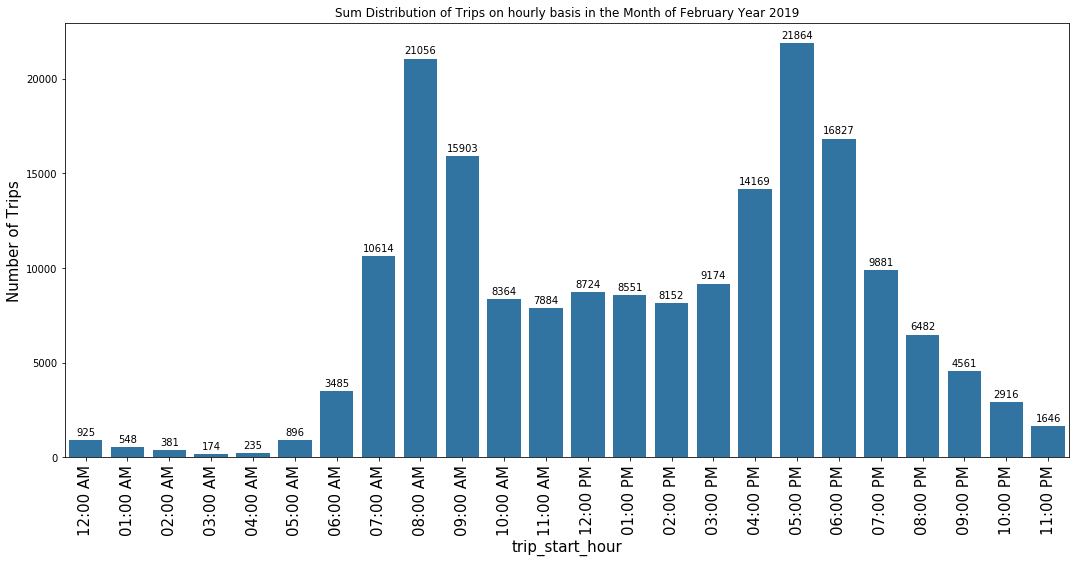

In [38]:
# write a for loop to assign serial numbers ranging from 0 to 24, to the 24 hours of the day
hour_code = []
for h in df1['trip_start_hour']:
    if h == '12:00 AM':
        hour_code.append (0)
    elif h == '01:00 AM':
        hour_code.append (1)
    elif h == '02:00 AM':
        hour_code.append (2)
    elif h == '03:00 AM':
        hour_code.append (3)
    elif h == '04:00 AM':
        hour_code.append (4)
    elif h == '05:00 AM':
        hour_code.append (5)
    elif h == '06:00 AM':
        hour_code.append (6)
    elif h == '07:00 AM':
        hour_code.append (7)
    elif h == '08:00 AM':
        hour_code.append (8)
    elif h == '09:00 AM':
        hour_code.append (9)
    elif h == '10:00 AM':
        hour_code.append (10)
    elif h == '11:00 AM':
        hour_code.append (11)
    elif h == '12:00 PM':
        hour_code.append (12)
    elif h == '01:00 PM':
        hour_code.append (13)
    elif h == '02:00 PM':
        hour_code.append (14)
    elif h == '03:00 PM':
        hour_code.append (15)
    elif h == '04:00 PM':
        hour_code.append (16)
    elif h == '05:00 PM':
        hour_code.append (17)
    elif h == '06:00 PM':
        hour_code.append (18)
    elif h == '07:00 PM':
        hour_code.append (19)
    elif h == '08:00 PM':
        hour_code.append (20)
    elif h == '09:00 PM':
        hour_code.append (21)
    elif h == '10:00 PM':
        hour_code.append (22)
    elif h == '11:00 PM':
        hour_code.append (23)
    elif h == '12:00 PM':
        hour_code.append (24)

# populate these codes in a new column in the dataframe
df1['Hour_code'] = hour_code

# use defined plot function
dist_bar('trip_start_hour', 'Hour_code', 'Sum Distribution of Trips on hourly basis in the Month of February Year 2019')

#### Obseravation

> 5:00 PM has the highest number of trips while 3:00 AM has the lowest number of trips

> The graph above shows that the number of riders starts very low very early in the morning (12:00 AM) and drops further till 3:00 AM when it is lowest. The number of riders starts increasing from 4:00 AM till 8:00 AM. There is a considerable drop between 9:00AM and 10:00 AM. There is a relatively constant number of riders between the hours of 10:00 AM through to 2:00 PM. Another rise in trips is seen from 3:00 PM to 5:00 PM when the number of trips rises to its peak at 21864 trips. And then finally, falls steadily till the midnight.

### Research Question 8: What are the top 10 trip start stations?

#### Visualization

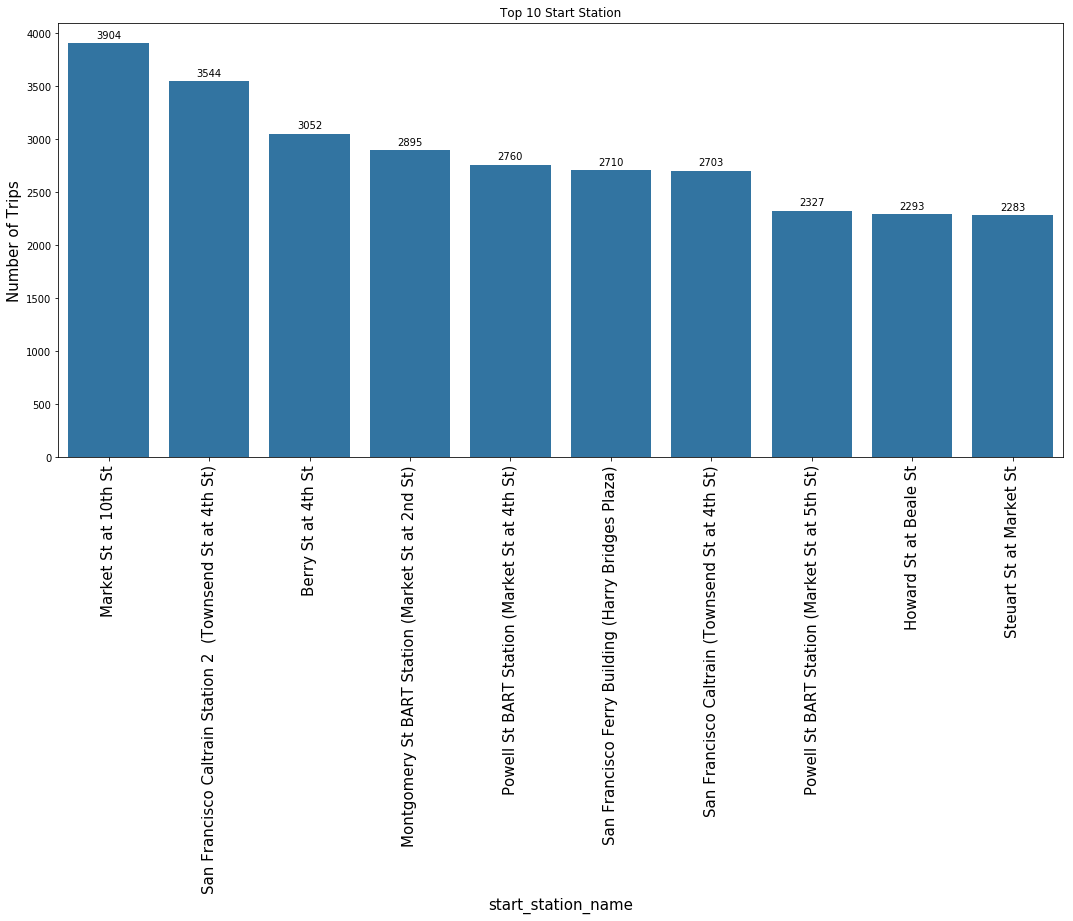

In [39]:
# make an object variable of start station name value counts
start_station_count = df1['start_station_name'].value_counts().rename_axis('start_station_name').reset_index(name='counts')
# select top ten rows of dataframe
top10_start_station = start_station_count.head(10)

# select last ten rows of dataframe
last10_start_staion = start_station_count.tail(10)

# define a bar plot function that takes one attribute and title
def dist_bar(attrib1, titled):
    # set plot size
    plt.figure(figsize=(18,8))
    
    # make all bars the same colour
    base_color = sb.color_palette()[0]
    
    if titled == 'Top 10 Start Station':
        plots = sb.barplot(data=top10_start_station, x=attrib1, y='counts', color=base_color)
    elif titled == 'Bottom 10 Start Station':
        plots = sb.barplot(data=last10_start_staion, x=attrib1, y='counts', color=base_color)
    
    # text annotation
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
    # setting the label for x-axis
    plt.xlabel(attrib1, size=15)
    
    # setting the label for y-axis
    plt.ylabel('Number of Trips', size=15)
    
    plt.xticks(size=15, rotation=90)
    
    # setting graph title
    plt.title(titled)
    
    plt.show()

# make plot
dist_bar('start_station_name', 'Top 10 Start Station')

#### Observation

> The chart above shows the top ten highest trip start station. The number one trip start staion is Market St at 10th St.

### Research Question 9: What are the Bottom 10 trip start stations?

#### Visualization

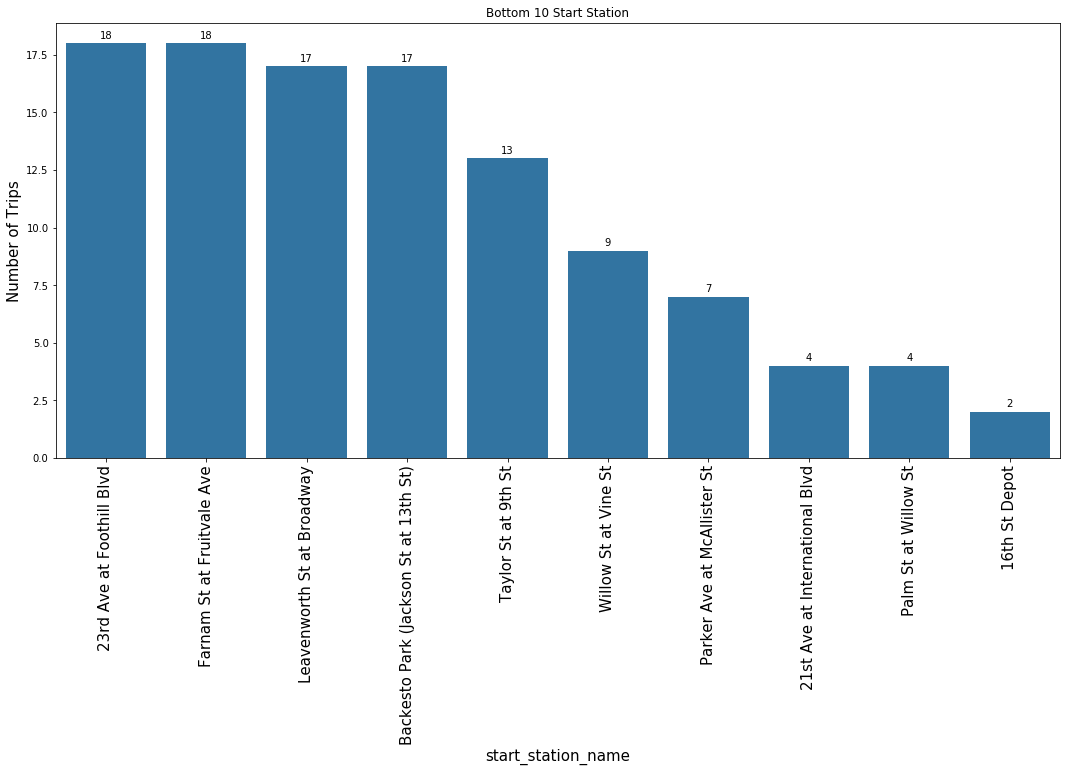

In [40]:
# make plot
dist_bar('start_station_name', 'Bottom 10 Start Station')

#### Observation

> The chart above shows the bottom ten lowest trip start station. The least start staion is 16th St at Depot.

### Research Question 10: What is the distribution of riders by gender?

#### Visualization

In [41]:
# view the number of distinct data entry in member_gender column
df1['member_gender'].nunique()

3

In [42]:
# create a dataframe of gender count
gender = df1['member_gender'].value_counts().rename_axis('member_gender').reset_index(name='counts')
# view dataframe
gender

,member_gender,counts
0,Male,130651
1,Female,40844
2,Other,3652


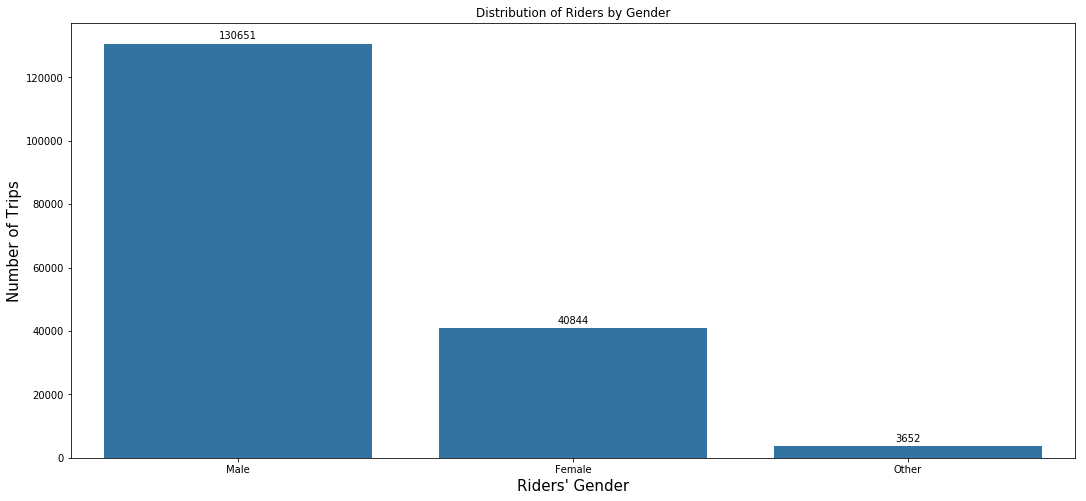

In [43]:
# set plot size
plt.figure(figsize=(18,8))
# make all bars the same colour
base_color = sb.color_palette()[0]
# select dataset, x and y variable for the plot
plots = sb.barplot(data=gender, x='member_gender', y='counts', color=base_color)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
# setting the label for x-axis
plt.xlabel("Riders' Gender", size=15)

# setting the label for y-axis
plt.ylabel('Number of Trips', size=15)

# setting graph title
plt.title("Distribution of Riders by Gender")
    
plt.show()

#### Observation

> Chart above shows riders are mostly male, then female. A few riders identify themselves as neither male nor female.

### Research Question 11: What is the distribution of riders by age bracket?

#### Visualization

    > The age of each rider will be calculated by subtracting the member_birth_year from the year the dataset was collated (2019). This difference (age) will be populated in a new column called 'member_age'
    
    But first, 'member_birth_year' column has to be cleaned!

In [44]:
# remove mising values
df2 = df1[df1['member_birth_year'].notna()]

# convert datatype from float to integer
df2['member_birth_year'] = df2['member_birth_year'].astype(int)

# confirm changes
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,bike_id,user_type,member_birth_year,member_gender,trip_start_day,trip_start_hour,start_station_name,end_station_name,start_datetime,end_datetime,start_date,end_date,start_time,end_time,duration_in_seconds,duration_in_minutes,duration_in_hours,Day_code,Hour_code
0,4902,Customer,1984,Male,Thursday,05:00 PM,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10,2019-03-01 08:01:55,2019-02-28,2019-03-01,17:32:10,08:01:55,52185,869,14,3,17
2,5905,Customer,1972,Male,Thursday,12:00 PM,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13,2019-03-01 05:24:08,2019-02-28,2019-03-01,12:13:13,05:24:08,61854,1030,17,3,12
3,6638,Subscriber,1989,Other,Thursday,05:00 PM,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26,2019-03-01 04:02:36,2019-02-28,2019-03-01,17:54:26,04:02:36,36490,608,10,3,17
4,4898,Subscriber,1974,Male,Thursday,11:00 PM,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18,2019-03-01 00:20:44,2019-02-28,2019-03-01,23:54:18,00:20:44,1585,26,0,3,23
5,5200,Subscriber,1959,Male,Thursday,11:00 PM,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58,2019-03-01 00:19:51,2019-02-28,2019-03-01,23:49:58,00:19:51,1793,29,0,3,23


In [45]:
# info on dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 19 columns):
bike_id                175147 non-null object
user_type              175147 non-null object
member_birth_year      175147 non-null int64
member_gender          175147 non-null object
trip_start_day         175147 non-null object
trip_start_hour        175147 non-null object
start_station_name     174952 non-null object
end_station_name       174952 non-null object
start_datetime         175147 non-null datetime64[ns]
end_datetime           175147 non-null datetime64[ns]
start_date             175147 non-null datetime64[ns]
end_date               175147 non-null datetime64[ns]
start_time             175147 non-null object
end_time               175147 non-null object
duration_in_seconds    175147 non-null int64
duration_in_minutes    175147 non-null int64
duration_in_hours      175147 non-null int64
Day_code               175147 non-null int64
Hour_code              175147 non-

In [46]:
# calculate riders' age as an object variable
df2['member_age'] = 2019 - df2['member_birth_year']
# a list of distinct ages
df2['member_age'].unique()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([ 35,  47,  30,  45,  60,  36,  31,  27,  23,  26,  29,  38,  44,
        41,  28,  22,  33,  19,  37,  24,  39,  46,  34,  48,  40,  52,
        21,  25,  42,  20,  32,  50,  56,  43,  55,  54,  58,  51,  53,
        57,  65,  61,  59,  49,  63,  62,  74, 119,  67,  71,  68,  78,
        69,  70,  66,  64,  73,  72,  88,  76,  77,  99,  86,  18, 141,
       118,  75,  91,  85,  80,  89, 117, 109,  81,  92])

In [47]:
# view minimum age
df2['member_age'].min()

18

In [48]:
# set bin edges and bin names to define categories of age
bin_edges = [13, 19, 29, 39, 49, 59, 69, 79, 141]
bin_names = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'too_old']

# populate the categories in a new column named age_class
df2['age_class'] = pd.cut(df2['member_age'], [13, 19, 29, 39, 49, 59, 69, 79, 141], labels=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'too_old'], include_lowest=True)

# view first five rows of the dataframe to confirm that the new column has been created
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,bike_id,user_type,member_birth_year,member_gender,trip_start_day,trip_start_hour,start_station_name,end_station_name,start_datetime,end_datetime,...,end_date,start_time,end_time,duration_in_seconds,duration_in_minutes,duration_in_hours,Day_code,Hour_code,member_age,age_class
0,4902,Customer,1984,Male,Thursday,05:00 PM,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10,2019-03-01 08:01:55,...,2019-03-01,17:32:10,08:01:55,52185,869,14,3,17,35,thirties
2,5905,Customer,1972,Male,Thursday,12:00 PM,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13,2019-03-01 05:24:08,...,2019-03-01,12:13:13,05:24:08,61854,1030,17,3,12,47,fourties
3,6638,Subscriber,1989,Other,Thursday,05:00 PM,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26,2019-03-01 04:02:36,...,2019-03-01,17:54:26,04:02:36,36490,608,10,3,17,30,thirties
4,4898,Subscriber,1974,Male,Thursday,11:00 PM,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18,2019-03-01 00:20:44,...,2019-03-01,23:54:18,00:20:44,1585,26,0,3,23,45,fourties
5,5200,Subscriber,1959,Male,Thursday,11:00 PM,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58,2019-03-01 00:19:51,...,2019-03-01,23:49:58,00:19:51,1793,29,0,3,23,60,sixties


In [49]:
# create an object variable of age class
ageclass = df2['age_class'].value_counts().rename_axis('age_class').reset_index(name='counts')
# view dataset
ageclass

,age_class,counts
0,thirties,69102
1,twenties,63671
2,fourties,24392
3,fifties,12116
4,sixties,3480
5,teens,1712
6,seventies,471
7,too_old,203


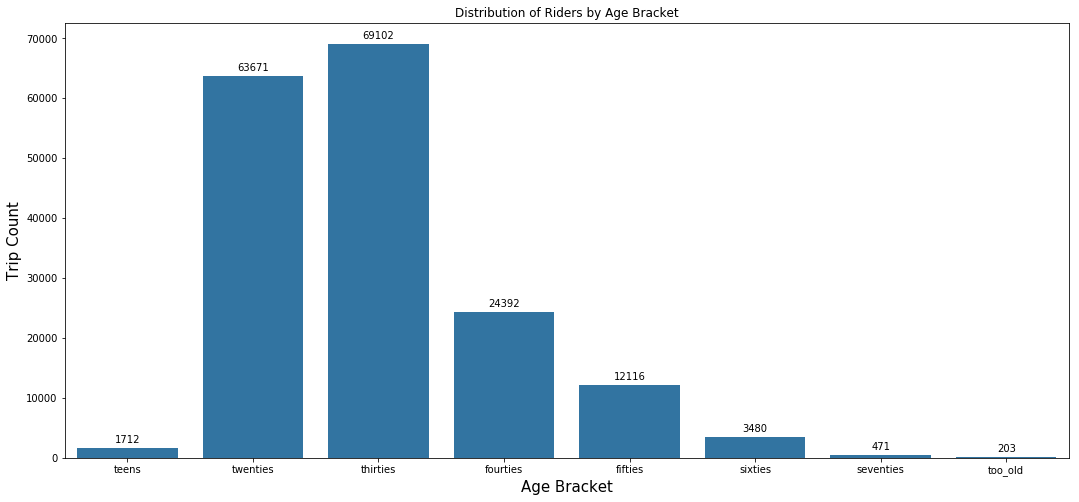

In [50]:
# set plot size
plt.figure(figsize=(18,8))
# make all bars the same colour
base_color = sb.color_palette()[0]
# select dataset, x and y axis variable
plots = sb.barplot(data=ageclass, x='age_class', y='counts', color=base_color)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
# setting the label for x-axis
plt.xlabel("Age Bracket", size=15)

# setting the label for y-axis
plt.ylabel('Trip Count', size=15)

# setting graph title
plt.title("Distribution of Riders by Age Bracket")
    
plt.show()

#### Observation

> Resulting chart shows that, only a few riders are in their teens. We see an increase of riders in their twenties, with highest (most) riders in their thirties. Then we see a very significant drop as the riders approach their thirties. There is a further general drop as the riders age further.

### Research Question 12: What is the distribution of trips through out the month of February 2019?

#### Visualization

In [51]:
df2['start_dayofmonth'] = df2['start_date'].dt.day

df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bike_id,user_type,member_birth_year,member_gender,trip_start_day,trip_start_hour,start_station_name,end_station_name,start_datetime,end_datetime,...,start_time,end_time,duration_in_seconds,duration_in_minutes,duration_in_hours,Day_code,Hour_code,member_age,age_class,start_dayofmonth
0,4902,Customer,1984,Male,Thursday,05:00 PM,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10,2019-03-01 08:01:55,...,17:32:10,08:01:55,52185,869,14,3,17,35,thirties,28
2,5905,Customer,1972,Male,Thursday,12:00 PM,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13,2019-03-01 05:24:08,...,12:13:13,05:24:08,61854,1030,17,3,12,47,fourties,28
3,6638,Subscriber,1989,Other,Thursday,05:00 PM,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26,2019-03-01 04:02:36,...,17:54:26,04:02:36,36490,608,10,3,17,30,thirties,28
4,4898,Subscriber,1974,Male,Thursday,11:00 PM,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18,2019-03-01 00:20:44,...,23:54:18,00:20:44,1585,26,0,3,23,45,fourties,28
5,5200,Subscriber,1959,Male,Thursday,11:00 PM,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58,2019-03-01 00:19:51,...,23:49:58,00:19:51,1793,29,0,3,23,60,sixties,28


In [52]:
start_day1 = df2['start_dayofmonth'].value_counts().sort_index()

start_day = df2['start_dayofmonth'].value_counts().sort_index().rename_axis('start_dayofmonth').reset_index(name='counts')
start_day

,start_dayofmonth,counts
0,1,5831
1,2,3005
2,3,2710
3,4,5273
4,5,8138
5,6,8660
6,7,8802
7,8,6098
8,9,2558
9,10,3707


In [53]:
# upgrade seaborn to version 0.9.0
# !pip install seaborn==0.9.0

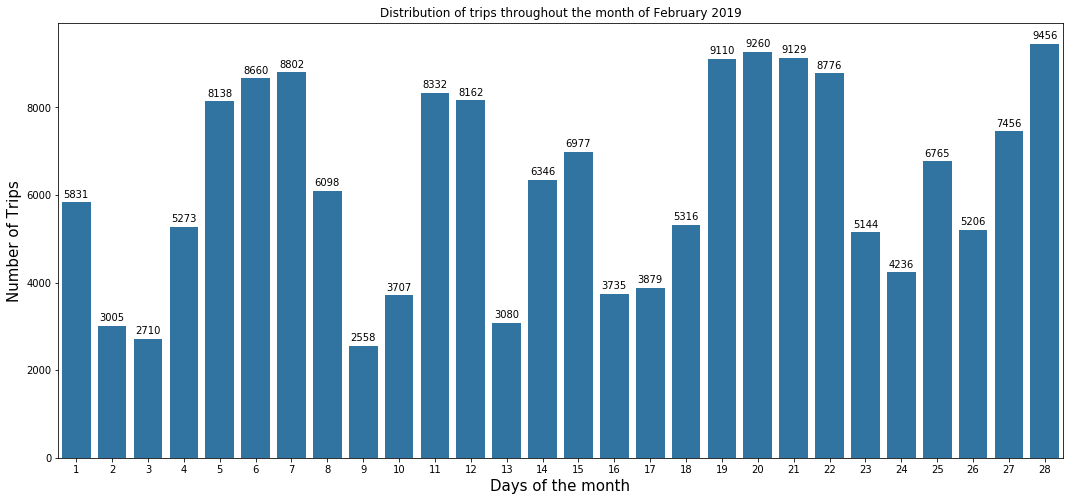

In [54]:
# set plot size
plt.figure(figsize=(18,8))
# make all bars the same colour
base_color = sb.color_palette()[0]
# select dataset, x and y axis variable
plots = sb.barplot(data=start_day, x='start_dayofmonth', y='counts', color=base_color)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
# setting the label for x-axis
plt.xlabel("Days of the month", size=15)

# setting the label for y-axis
plt.ylabel('Number of Trips', size=15)

# setting graph title
plt.title("Distribution of trips throughout the month of February 2019")
    
plt.show()

#### Observation

> Resulting chart shows a sinusoidal distribution of trips with different highs and lows across the month. But there is a significant increase when comparing the first day of the month (1st of February) with the last day of the month (28th of February). The 9th of February recorded the lowest turn out while the peak number of trips was recorded on the 28th of February.

### Research Question 13: Compare the two user types in terms of trip duration?

> First, the two user types will be compared in terms of maximum and minimum trip duration across days of the week respectively.

> Then, a deeper analysis will be carried out to compare the overall mean trip duration.

#### Visualization 1

In [55]:
# create a dataframe showing the maximum trip duration across days of the week
max_usertype = df2.groupby(['Day_code', 'trip_start_day'], as_index=False)['user_type', 'duration_in_seconds'].max()
# view dataframe
max_usertype

,Day_code,trip_start_day,user_type,duration_in_seconds
0,0,Monday,Subscriber,83407
1,1,Tuesday,Subscriber,79548
2,2,Wednesday,Subscriber,83195
3,3,Thursday,Subscriber,82512
4,4,Friday,Subscriber,74408
5,5,Saturday,Subscriber,84548
6,6,Sunday,Subscriber,73930


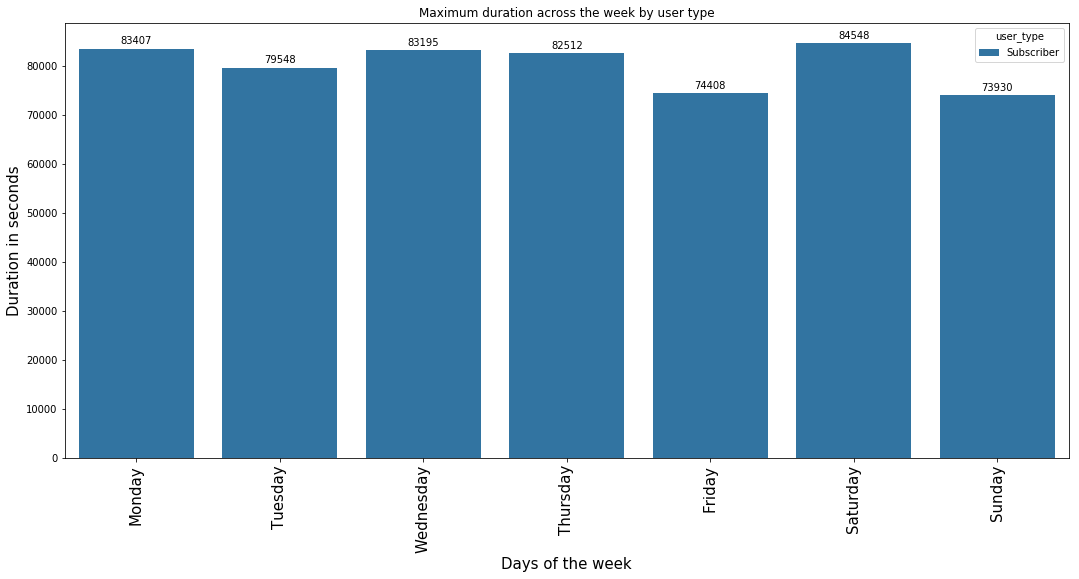

In [56]:
# define function to plot multivariate bar chart


def stat_bar(dat, titled):
    # set plot size
    plt.figure(figsize=(18,8))
    # select dataset, hue, x and y axis variable
    plots = sb.barplot(x='trip_start_day', y='duration_in_seconds', hue='user_type', data=dat, dodge=False)

    # text annotation
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
    # setting the label for x-axis
    plt.xlabel("Days of the week", size=15)
    # rotate x label
    plt.xticks(size=15, rotation=90)

    # setting the label for y-axis
    plt.ylabel('Duration in seconds', size=15)

    # setting graph title
    plt.title(titled)
    
    plt.show()

# plot bar
stat_bar(max_usertype, 'Maximum duration across the week by user type')

#### Observation 1

> Charts above shows that Subscriber user types makes the longest trips from Mondays through to Sundays

#### Visualization 2

In [57]:
# create a dataframe showing the minimum trip duration across days of the week
min_usertype = df2.groupby(['Day_code', 'trip_start_day'], as_index=False)['user_type', 'duration_in_seconds'].min()
# view  dataframe
min_usertype

,Day_code,trip_start_day,user_type,duration_in_seconds
0,0,Monday,Customer,61
1,1,Tuesday,Customer,61
2,2,Wednesday,Customer,61
3,3,Thursday,Customer,61
4,4,Friday,Customer,61
5,5,Saturday,Customer,62
6,6,Sunday,Customer,61


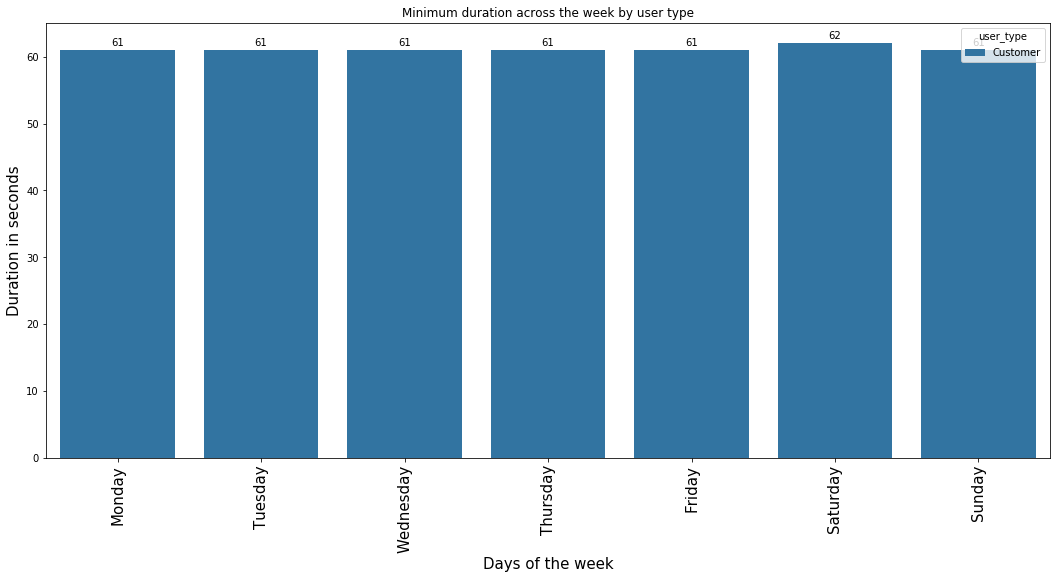

In [58]:
# plot bar chart
stat_bar(min_usertype, 'Minimum duration across the week by user type')

#### Observation 2

> Charts above shows that Customer user types makes the shortest trips from Mondays through to Sundays

#### Visualization 3

In [59]:
# create a dataframe showing the mean trip duration across days of the week for both user types
mean_usertype = df2.groupby(['Day_code', 'trip_start_day', 'user_type'], as_index=False)['duration_in_seconds'].mean()
# view dataframe
mean_usertype

,Day_code,trip_start_day,user_type,duration_in_seconds
0,0,Monday,Customer,1365.169535
1,0,Monday,Subscriber,630.646392
2,1,Tuesday,Customer,1033.826544
3,1,Tuesday,Subscriber,622.202697
4,2,Wednesday,Customer,1226.689183
5,2,Wednesday,Subscriber,619.919549
6,3,Thursday,Customer,1182.932522
7,3,Thursday,Subscriber,631.416683
8,4,Friday,Customer,1114.369745
9,4,Friday,Subscriber,637.681943


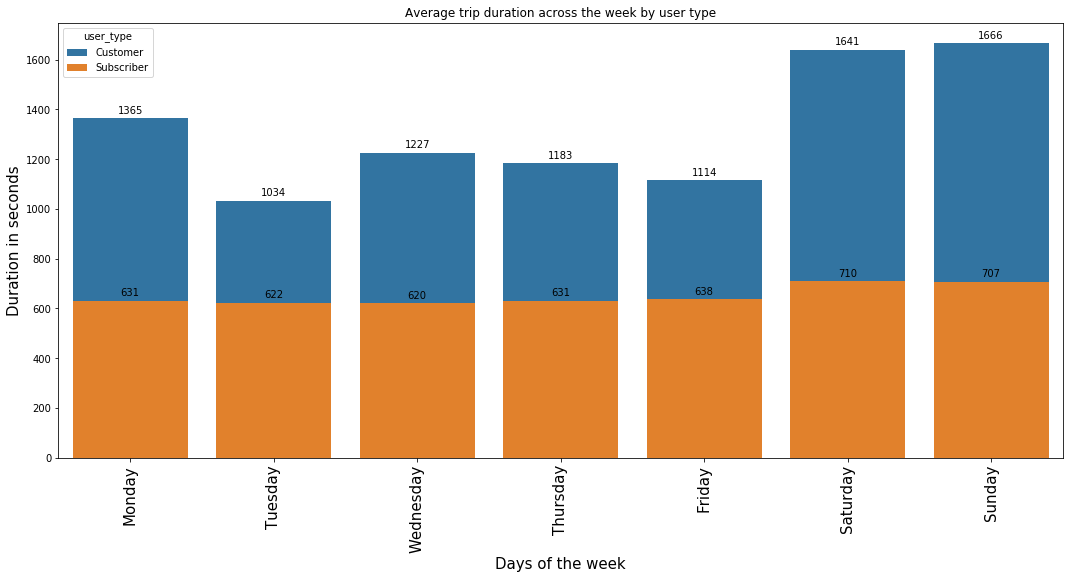

In [60]:
# plot bar chart
stat_bar(mean_usertype, 'Average trip duration across the week by user type')

#### Observation 3

> Charts above shows that customers surprisingly has higher average trip duration across the week from Mondays through to Sundays, than subscribers.

#### Visualization 4

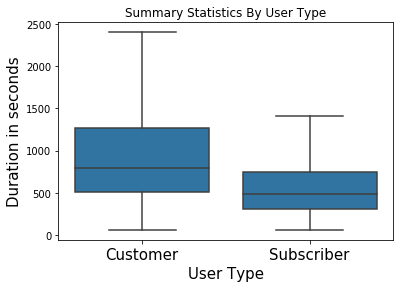

In [61]:
# make all bars the same colour
base_color = sb.color_palette()[0]

# select dataset, hue, x and y axis variable
plots = sb.boxplot(data=df1, x='user_type', y= 'duration_in_seconds', color=base_color, showfliers=False)

# setting the label for x-axis
plt.xlabel("User Type", size=15)
# x label
plt.xticks(size=15)

# setting the label for y-axis
plt.ylabel('Duration in seconds', size=15)

# setting graph title
plt.title('Summary Statistics By User Type')
plt.show()

#### Observation 4

> The box plot above gives a perfect summary and comparison between both user types as thus:
> 1. customer user type has higher maximum trip duration than subscribers
> 2. Subscriber user type has lower minimum trip duration compared to customers
> 3. Customer user type has higher average trip duration (even higher than the maximum trip duration for subscribers) than subscriber.

## Conclusions

The following conclusions can be drawn from my analysis of the Ford GoBike Data System;
- Number of trips by riders is influenced by days of the week with most trips happening during the week days and fewer trips happening on weekends. Most of the trips were taken on Thursdays while Saturdays was the least

- Number of trips by riders is also affected by the hours of the day as the number of riders is very low very early in the morning (12:00 AM) and drops further till 3:00 AM when it is lowest. The number of riders starts increasing from 4:00 AM till 8:00 AM. There is a considerable drop between 9:00AM and 10:00 AM. There is a relatively constant number of riders between the hours of 10:00 AM through to 2:00 PM. Another rise in trips is seen from 3:00 PM to 5:00 PM when the number of trips rises to its peak at 21,864 trips. And then finally, falls steadily till the midnight. 5:00 PM has the highest number of trips while 3:00 AM has the lowest number of trips.

- The number one trip start staion is Market St at 10th St while the least start staion is 16th St at Depot.

- Number of trips and average trip duration is also influenced by gender as riders are mostly male, then female. A few riders identify themselves as neither male nor female.

-  Bike rides is influenced by age bracket. Only a few riders are in their teens. We see an increase of riders in their twenties, with highest (most) riders in their thirties. Then we see a very significant drop as the riders approach their thirties. There is a further general drop as the riders age further.

- Summary of the relationship between trip duration and user types are as follows:
> 1. customer user type has higher maximum trip duration than subscribers
> 2. Subscriber user type has lower minimum trip duration compared to customers
> 3. Customer user type has higher average trip duration (even higher than the maximum trip duration for subscribers) than subscriber.
> 4. Customers has higher average trip duration across the week from Mondays through to Sundays, than subscribers.
> 5. Subscriber user types makes the longest trips from Mondays through to Sundays while Customer user types makes the shortest trips from Mondays through to Sundays.


__Limitations__
> Though deliberate effort was put in to manage limitations posed by the dataset, one of which was to delay removal of NaN values till the very later part of the exploration exercise and was specific to only one feature exploration.

> However, the following limitations were encountered:
- Missing values in the "member_birth_year" column.
- Inadequate number of numeric features to aid deeper exploration of dataset. Duration_sec column is the only column in the dataset that provides numeric data for exploration and feature engineeering - This obviously isn't enough.

